<a href="https://colab.research.google.com/github/Zaxzz/Visi_Komputer/blob/main/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

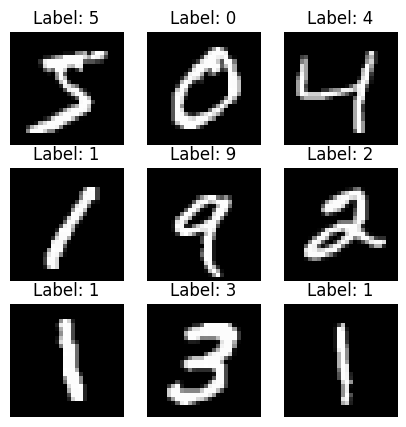

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


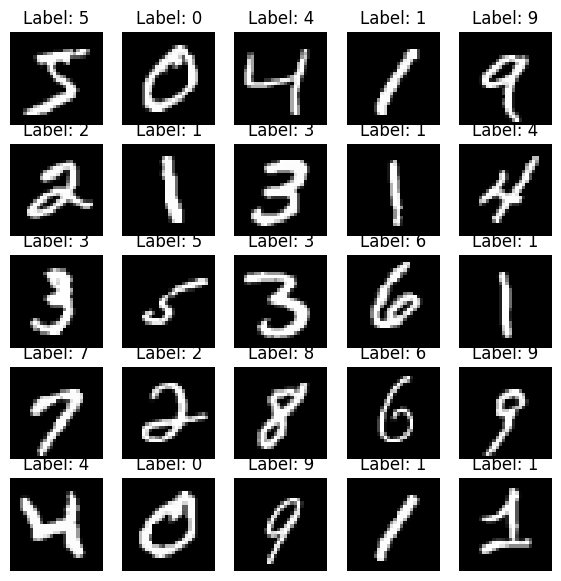

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## 2. Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat

y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat

y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


## 3. Praktikum D3 – Membangun CNN Sederhana

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.3637 - loss: 1.7431 - val_accuracy: 0.5534 - val_loss: 1.2480
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.5734 - loss: 1.2019 - val_accuracy: 0.6178 - val_loss: 1.0684
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.6380 - loss: 1.0331 - val_accuracy: 0.6404 - val_loss: 1.0095
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6723 - loss: 0.9395 - val_accuracy: 0.6746 - val_loss: 0.9452
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.6991 - loss: 0.8579 - val_accuracy: 0.6856 - val_loss: 0.9212
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7220 - loss: 0.7977 - val_accuracy: 0.6768 - val_loss: 0.9402
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7429 - loss: 0.7389 - val_accuracy: 0.6948 - val_loss: 0.8916
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7623 -

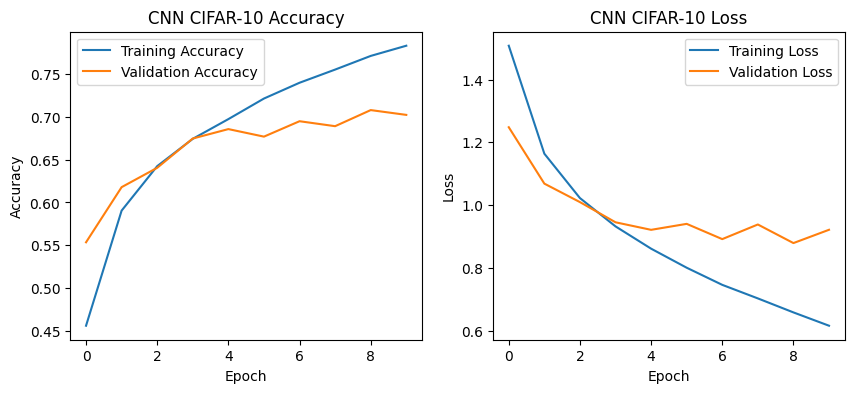

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_cnn = x_train / 255.0
x_test_cnn = x_test / 255.0

# Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=10,
    validation_split=0.1
)

# Plot hasil training
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_cnn = x_train / 255.0
x_test_cnn = x_test / 255.0

# Model CNN dengan tambahan 1 Conv2D sebelum Flatten
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),  # ✅ tambahan Conv2D baru
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=10,
    validation_split=0.1
)

# Evaluasi di test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot hasil training
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3487 - loss: 1.7512 - val_accuracy: 0.5222 - val_loss: 1.3214
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5793 - loss: 1.1868 - val_accuracy: 0.5930 - val_loss: 1.1366
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6452 - loss: 1.0103 - val_accuracy: 0.6670 - val_loss: 0.9549
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.6876 - loss: 0.8873 - val_accuracy: 0.7008 - val_loss: 0.8753
Epoch 5/10
 651/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.7226 - loss: 0.7997

## 4. Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 45ms/step - accuracy: 0.3685 - loss: 1.7256 - val_accuracy: 0.5534 - val_loss: 1.2295
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.5884 - loss: 1.1690 - val_accuracy: 0.6382 - val_loss: 1.0454
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6384 - loss: 1.0336 - val_accuracy: 0.6518 - val_loss: 1.0052
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.6771 - loss: 0.9223 - val_accuracy: 0.6770 - val_loss: 0.9388
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7008 - loss: 0.8647 - val_accuracy: 0.6940 - val_loss: 0.9025
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7213 - loss: 0.8033 - val_accuracy: 0.6906 - val_loss: 0.8948
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.7345 - loss: 0.7543 - val_accuracy: 0.7100 - val_loss: 0.8784
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7566 -

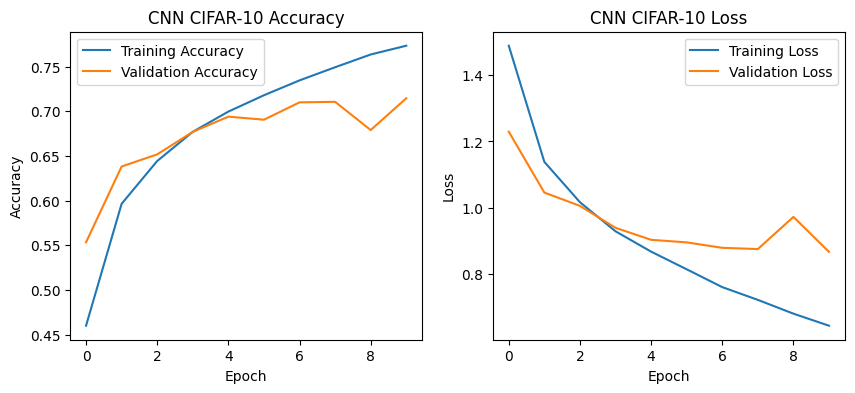

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
